In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
i = 0
notUS = []
for i in range(0,len(df)):
    if (df.iloc[i]['country']!= 'USA'):
        notUS.append(i)
print(len(notUS))
print(len(df))

1236
5043


In [4]:
df_drop = df.drop(df.index[notUS])


In [5]:
df_drop.to_csv('only_US.csv')
print(len(df_drop))

3807


In [6]:
i = 0
tooOld = []
for i in range(0,len(df_drop)):
    if (df_drop.iloc[i]['title_year']< 2000):
        tooOld.append(i)
print(len(tooOld))
print(len(df_drop))

1073
3807


In [7]:
newfilms = df_drop.drop(df_drop.index[tooOld])

range(0, 66)


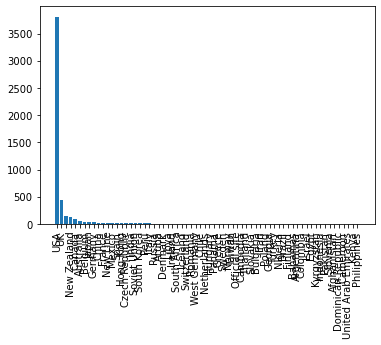

In [8]:
import plotly.express as px
df['country'].fillna('', inplace=True)
countries = df.country.unique()
print(range(len(countries)))
xpos = range(len(countries))
plt.bar(xpos, df.country.value_counts())
plt.xticks(xpos, countries,rotation = 'vertical')
plt.show()

In [9]:
fig = px.histogram(df_drop, x="gross",title ='All films\' revenue' )
fig.show()

In [10]:
fig = px.histogram(df, x="gross",title ='All films\' revenue' )
fig.show()

In [11]:
df['content_rating'].fillna('unknown', inplace=True)
content_ratings = df.content_rating.unique()
xpos = range(len(content_ratings))
plt.bar(xpos, df.content_rating.value_counts())
plt.xticks(xpos, content_ratings,rotation = 'vertical')
plt.show()

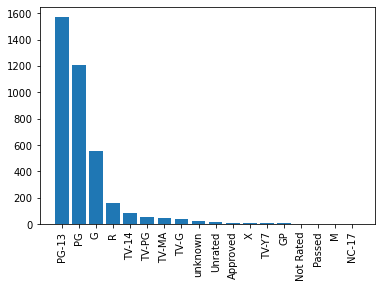

In [12]:
df_drop['content_rating'].fillna('unknown', inplace=True)
content_ratings = df_drop.content_rating.unique()
xpos = range(len(content_ratings))
plt.bar(xpos, df_drop.content_rating.value_counts())
plt.xticks(xpos, content_ratings,rotation = 'vertical')
plt.show()

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



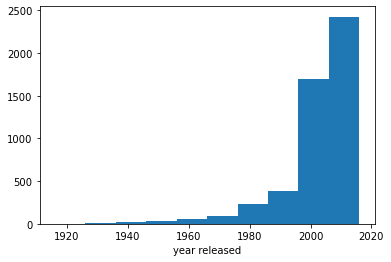

In [13]:
plt.hist([df['title_year']])
plt.xlabel('year released')
plt.show()

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



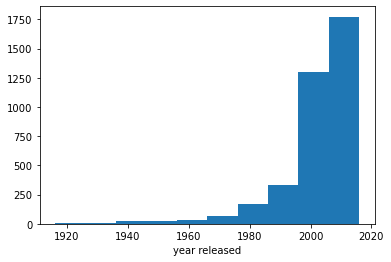

In [14]:
plt.hist([df_drop['title_year']])
plt.xlabel('year released')
plt.show()

In [15]:
fig = px.histogram(df, x="budget",title="All films budget")
fig.show() 

In [16]:
fig = px.histogram(df_drop, x="budget",title='Only US films budget')
fig.show() 

In [17]:
plt.hist([df_drop['gross']])
plt.xlabel('gross revenue (hundreds of millions)')
plt.ylabel('number of films')
plt.title('Movie gross revenue distribution')
plt.show()

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



In [18]:
plt.hist([df_drop['duration']])
plt.xlabel('Duration (minutes)')
plt.ylabel('number of films')
plt.title('Movie duration distribution')
plt.show()

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



In [19]:
plt.scatter(df_drop.duration, df_drop.gross)
plt.show()

In [20]:
plt.scatter(df_drop.budget,df_drop.imdb_score)

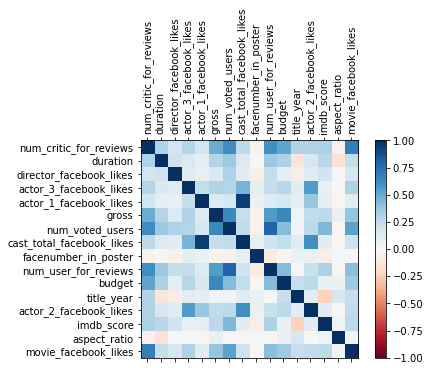

In [21]:
corr = df_drop.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.colorbar(ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1))

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
plt.xticks(rotation = 'vertical')

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()

Nothing interesting here, the facebook likes of the main actor strong correlate with the total facebook likes of the cast. IMDB score did not correlate with much, except for the total # of people who gave ratings to the movie. Higher budget films correlate positively with number of critic reviews. 

In [22]:
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [23]:
PG = df_drop[(df_drop['content_rating'] == 'PG')]
PG_13 = df_drop[(df_drop['content_rating'] == 'PG-13')]
R = df_drop[(df_drop['content_rating'] == 'R')]
G = df_drop[(df_drop['content_rating'] == 'G')]
PG['gross'].fillna(PG['gross'].mean(),inplace = True)
PG_13['gross'].fillna(PG['gross'].mean(),inplace = True)
R['gross'].fillna(R['gross'].mean(),inplace = True)
G['gross'].fillna(G['gross'].mean(),inplace = True)
bp = plt.boxplot([PG['gross'],PG_13['gross'],R['gross'],G['gross']])
plt.title('Gross revenue by content rating')
plt.xticks([1,2,3,4],['PG Rated','PG-13 Rated','R Rated','G-rated'])
plt.ylabel('Gross Revenue (hundred millions)')

plt.show()

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
plt.scatter(df_drop.imdb_score,df_drop.gross)
plt.xlabel('IMDB Score (0-10)')
plt.ylabel('Gross Revenue (hundreds of millions)')
plt.title('IMDB ranking and movie revenue')
plt.show()

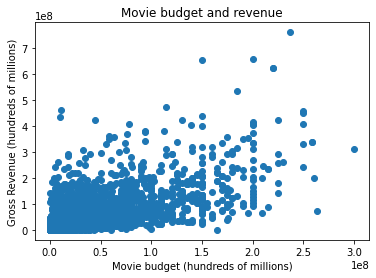

In [25]:
plt.scatter(df_drop.budget,df_drop.gross)
plt.xlabel('Movie budget (hundreds of millions)')
plt.ylabel('Gross Revenue (hundreds of millions)')
plt.title('Movie budget and revenue')
plt.show()

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



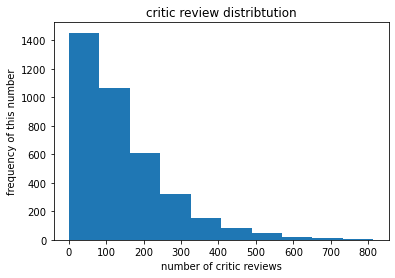

In [26]:
plt.hist(df_drop.num_critic_for_reviews)
plt.xlabel('number of critic reviews')
plt.ylabel('frequency of this number')
plt.title('critic review distribtution')
plt.show()

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



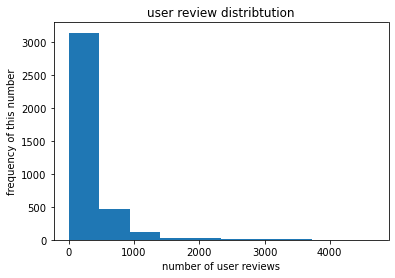

In [27]:
plt.hist(df_drop.num_user_for_reviews)
plt.xlabel('number of user reviews')
plt.ylabel('frequency of this number')
plt.title('user review distribtution')
plt.show()

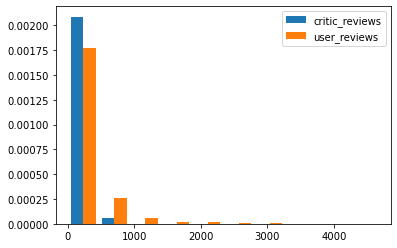

In [28]:
reviews = [df_drop['num_critic_for_reviews'],df_drop['num_user_for_reviews']]
labels = ['critic_reviews','user_reviews']
plt.hist(reviews,density=True, histtype='bar', stacked=False,label=labels)
plt.legend(loc="upper right")
plt.show()

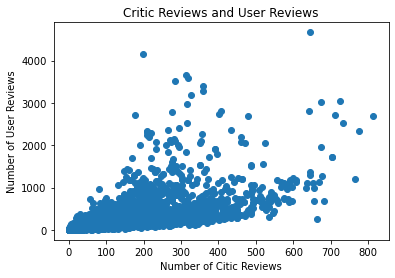

In [29]:
plt.scatter(df_drop.num_critic_for_reviews,df_drop.num_user_for_reviews)
plt.xlabel('Number of Citic Reviews')
plt.ylabel('Number of User Reviews')
plt.title('Critic Reviews and User Reviews')
plt.show()

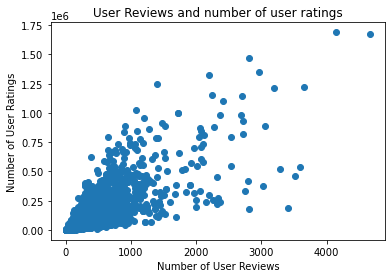

In [30]:
plt.scatter(df_drop.num_user_for_reviews,df_drop.num_voted_users)
plt.xlabel('Number of User Reviews')
plt.ylabel('Number of User Ratings')
plt.title('User Reviews and number of user ratings')
plt.show()

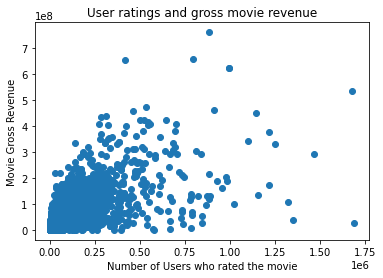

In [31]:
plt.scatter(df_drop.num_voted_users,df_drop.gross)
plt.xlabel('Number of Users who rated the movie')
plt.ylabel('Movie Gross Revenue')
plt.title('User ratings and gross movie revenue')
plt.show()

In [32]:
fig = px.box(df_drop, x="title_year", y="gross")
fig.show()

In [33]:
fig = px.box(df_drop, x="content_rating", y="gross",title="Gross Earnings by Content Rating")
fig.show()

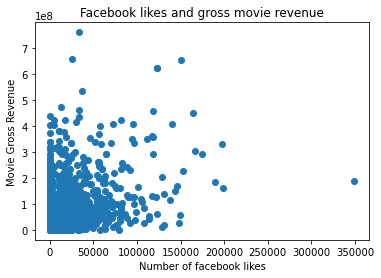

In [34]:
plt.scatter(df_drop.movie_facebook_likes,df_drop.gross)
plt.xlabel('Number of facebook likes')
plt.ylabel('Movie Gross Revenue')
plt.title('Facebook likes and gross movie revenue')
plt.show()

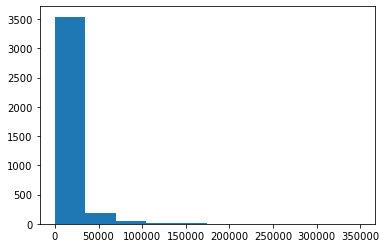

1644


In [35]:
plt.hist(df_drop.movie_facebook_likes)
plt.show()
count = 0
for i in range(0, len(df_drop['movie_facebook_likes'])):
    if df_drop.iloc[i]['movie_facebook_likes'] == 0:
        count+=1
print(count)

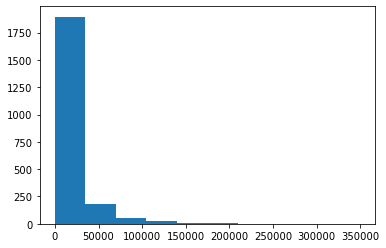

0


In [36]:
fb_likes = df_drop['movie_facebook_likes']
fb_likes_greater0 = fb_likes[fb_likes > 0]
plt.hist(fb_likes_greater0)
plt.show()
count = 0
for i in range(0, len(fb_likes_greater0)):
    if fb_likes_greater0.iloc[i] == 0:
        count+=1
print(count)

In [37]:
gross_rev = df_drop['gross']
gross_rev_for_fb = gross_rev[fb_likes > 0]
print(gross_rev_for_fb)
print(fb_likes_greater0)


0       760505847.0
3       448130642.0
5        73058679.0
7       200807262.0
8       458991599.0
           ...     
5037         4584.0
5039            NaN
5040            NaN
5041        10443.0
5042        85222.0
Name: gross, Length: 2163, dtype: float64
0        33000
3       164000
5        24000
7        29000
8       118000
         ...  
5037       413
5039     32000
5040        16
5041       660
5042       456
Name: movie_facebook_likes, Length: 2163, dtype: int64


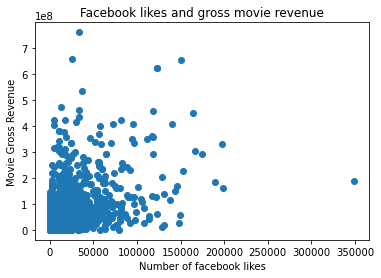

In [38]:
plt.scatter(fb_likes_greater0,gross_rev_for_fb)
plt.xlabel('Number of facebook likes')
plt.ylabel('Movie Gross Revenue')
plt.title('Facebook likes and gross movie revenue')
plt.show()

In [39]:
df_drop.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

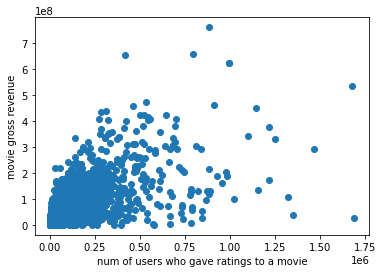

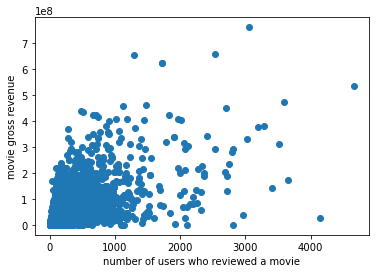

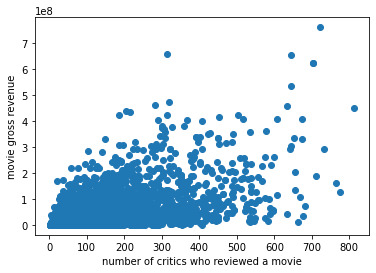

In [40]:
plt.scatter(df_drop.num_voted_users,df_drop.gross)
plt.xlabel('num of users who gave ratings to a movie')
plt.ylabel('movie gross revenue')
plt.show()
plt.scatter(df_drop.num_user_for_reviews,df_drop.gross)
plt.xlabel('number of users who reviewed a movie')
plt.ylabel('movie gross revenue')
plt.show()
plt.scatter(df_drop.num_critic_for_reviews,df_drop.gross)
plt.xlabel('number of critics who reviewed a movie')
plt.ylabel('movie gross revenue')
plt.show()

In [41]:
X = df_drop.drop(['gross'],axis = 1)
Y = df_drop[['gross']]
#get correlations of each features in dataset
corrmat = df_drop.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_drop[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_updated = X.drop(['color','director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country','content_rating'],axis = 1)
bestfeatures = SelectKBest(score_func=chi2, k=10)
X_updated.fillna(X_updated.mean(),inplace=True)
Y.fillna(Y.mean(),inplace=True)
Y = Y.astype(int)

fit = bestfeatures.fit(X_updated,Y)

dfscores = pd.DataFrame(fit.scores_)
dfpvals = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_updated.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

C:\Users\gergo\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                        Specs         Score
9                      budget  1.748190e+11
5             num_voted_users  8.868306e+08
14       movie_facebook_likes  1.883633e+08
6   cast_total_facebook_likes  1.212894e+08
4      actor_1_facebook_likes  1.205280e+08
2     director_facebook_likes  4.184639e+07
11     actor_2_facebook_likes  3.858324e+07
3      actor_3_facebook_likes  1.675922e+07
8        num_user_for_reviews  1.915252e+06
0      num_critic_for_reviews  3.863660e+05


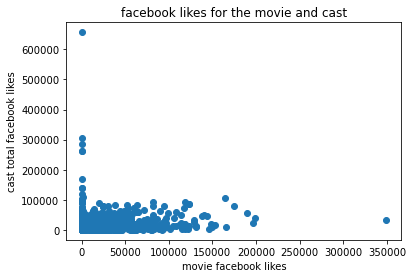

In [43]:
#looking if facebook likes for the movie are related to facebook likes for the cast
plt.scatter(df_drop.movie_facebook_likes,df_drop.cast_total_facebook_likes)
plt.xlabel('movie facebook likes')
plt.ylabel('cast total facebook likes')
plt.title('facebook likes for the movie and cast')
plt.show()

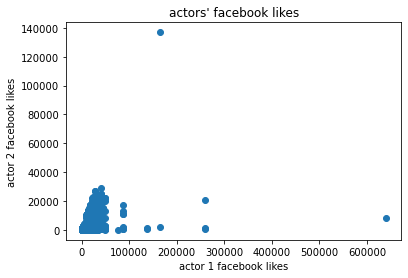

In [44]:
#looking if facebook likes for the movie are related to facebook likes for the cast
plt.scatter(df_drop.actor_1_facebook_likes,df_drop.actor_2_facebook_likes)
plt.xlabel('actor 1 facebook likes')
plt.ylabel('actor 2 facebook likes')
plt.title('actors\' facebook likes')
plt.show()

In [45]:
actor1_fb_likes = df_drop['actor_1_facebook_likes']
actor1_fb_likes_restricted = actor1_fb_likes[actor1_fb_likes < 3000]
gross_rev = df_drop['gross']
gross_rev_actor1fb = gross_rev[actor1_fb_likes_restricted]
plt.scatter(actor1_fb_likes_restricted,gross_rev_actor1fb)
plt.xlabel('actor 1 facebook likes')
plt.ylabel('gross rev')
plt.title('actor 1 facebook likes and gross rev')
plt.show()

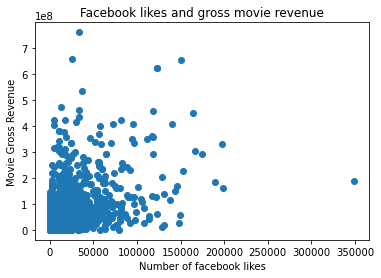

In [46]:
plt.scatter(fb_likes_greater0,gross_rev_for_fb)
plt.xlabel('Number of facebook likes')
plt.ylabel('Movie Gross Revenue')
plt.title('Facebook likes and gross movie revenue')
plt.show()

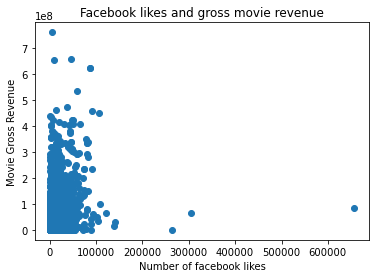

In [47]:

plt.scatter(df_drop.cast_total_facebook_likes,df_drop.gross)
plt.xlabel('Number of facebook likes')
plt.ylabel('Movie Gross Revenue')
plt.title('Facebook likes and gross movie revenue')
plt.show()

In [48]:
cast_fb_likes = df_drop['cast_total_facebook_likes']
cast_fb_likes.fillna(cast_fb_likes.mean(),inplace=True)
cast_fb_likes_greater0 = cast_fb_likes[cast_fb_likes > 0]
#rev_castFB = df_drop.gross[cast_fb_likes_greater0]
fig = px.scatter(df_drop, x="cast_total_facebook_likes", y="gross")
fig.show()

In [50]:
from sklearn import preprocessing
df_drop['imdb_score_scaled']=preprocessing.scale(df_drop['imdb_score'])
df_drop['budget_scaled']=preprocessing.scale(df_drop['budget'])
df_drop['num_voted_users_scaled']=preprocessing.scale(df_drop['num_voted_users'])
df_drop['movie_facebook_likes_scaled']=preprocessing.scale(df_drop['movie_facebook_likes'])
df_drop['cast_total_facebook_likes_scaled']=preprocessing.scale(df_drop['cast_total_facebook_likes'])
df_drop['num_critic_for_reviews_scaled']=preprocessing.scale(df_drop['num_critic_for_reviews'])
df_drop['gross_scaled']=preprocessing.scale(df_drop['gross'])

In [51]:
df_drop.columns
df_drop.to_csv('movies_scaled_features.csv')

In [52]:
dummies = pd.get_dummies(df_drop['content_rating'])
dummies.head(10)

Approved  G  GP  M  NC-17  Not Rated  PG  PG-13  Passed  R  TV-14  TV-G  \
0          0  0   0  0      0          0   0      1       0  0      0     0   
1          0  0   0  0      0          0   0      1       0  0      0     0   
3          0  0   0  0      0          0   0      1       0  0      0     0   
5          0  0   0  0      0          0   0      1       0  0      0     0   
6          0  0   0  0      0          0   0      1       0  0      0     0   
7          0  0   0  0      0          0   1      0       0  0      0     0   
8          0  0   0  0      0          0   0      1       0  0      0     0   
10         0  0   0  0      0          0   0      1       0  0      0     0   
11         0  0   0  0      0          0   0      1       0  0      0     0   
13         0  0   0  0      0          0   0      1       0  0      0     0   

    TV-MA  TV-PG  TV-Y7  Unrated  X  unknown  
0       0      0      0        0  0        0  
1       0      0      0        0  0        0  
3       0      0      0        0  0        0  
5       0      0      0        0  0        0  
6       0      0      0        0  0        0  
7       0      0      0        0  0        0  
8       0      0      0        0  0        0  
10      0      0      0        0  0        0  
11      0      0      0        0  0        0  
13      0      0      0        0  0        0